In [ ]:
#1.
#implement the Naive Bayes method using scikit -learn library    
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, accuracy_score

#use the dataset available with the name glass
glass_data = pd.read_csv('C://ALL//photos//ALL_FILES//CourseWork//Neural_Networks////NNDL_Code and Data//glass.csv')

x_train = glass_data.drop("Type", axis=1)
y_train = glass_data['Type']

#use test_train_split to create training and testing part
x_train, x_test, y_train, y_test = train_test_split(x_train, y_train, test_size=0.2, random_state=0)

# Train the model using the training sets
classifier = GaussianNB()
classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_test)

# Classification report 
c_report = classification_report(y_test, y_pred)
print(c_report)

#evaluate the model on test part using score
print("Naive Bayes accuracy is: ",  (accuracy_score(y_test, y_pred))*100)


In [ ]:
#1
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Load the dataset
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/daily-min-temperatures.csv"
data = pd.read_csv(url, parse_dates=['Date'], index_col='Date')

# Preprocessing
# Check for missing values
missing_values = data.isnull().sum()
print("Missing Values:\n", missing_values)

# Normalize the data
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data)

# Splitting into training and test sets
train_size = int(len(data_scaled) * 0.8)  # 80% for training
test_size = len(data_scaled) - train_size
train, test = data_scaled[0:train_size,:], data_scaled[train_size:len(data_scaled),:]

print("Training set size:", len(train))
print("Test set size:", len(test))

# Visualize the original and normalized data
plt.figure(figsize=(10, 6))
plt.plot(data.index, data['Temp'], label='Original Data')
plt.title('Daily Minimum Temperatures in Melbourne')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.legend()
plt.show()

In [ ]:

#3
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Load and preprocess the dataset
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/daily-min-temperatures.csv"
data = pd.read_csv(url, parse_dates=['Date'], index_col='Date')
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data)

# Define function to create dataset with input and output sequences
def create_dataset(data, time_steps):
    X, y = [], []
    for i in range(len(data) - time_steps):
        X.append(data[i:(i + time_steps), 0])
        y.append(data[i + time_steps, 0])
    return np.array(X), np.array(y)

# Set time steps and split into train and test sets
time_steps = 30
X, y = create_dataset(data_scaled, time_steps)
X_train, X_test = X[:int(X.shape[0]*0.8)], X[int(X.shape[0]*0.8):]
y_train, y_test = y[:int(y.shape[0]*0.8)], y[int(y.shape[0]*0.8):]

# Reshape input to be [samples, time steps, features]
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

# Define the LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=50))
model.add(Dropout(0.2))
model.add(Dense(units=1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.1)

# Plot training loss and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Make predictions
train_predictions = model.predict(X_train)
test_predictions = model.predict(X_test)

# Invert predictions to original scale
train_predictions = scaler.inverse_transform(train_predictions)
y_train = scaler.inverse_transform([y_train])
test_predictions = scaler.inverse_transform(test_predictions)
y_test = scaler.inverse_transform([y_test])

# Calculate RMSE
train_rmse = np.sqrt(mean_squared_error(y_train[0], train_predictions[:,0]))
test_rmse = np.sqrt(mean_squared_error(y_test[0], test_predictions[:,0]))
print('Train RMSE:', train_rmse)
print('Test RMSE:', test_rmse)

Frist few rows of the data frame
   YearsExperience   Salary
0              1.1  39343.0
1              1.3  46205.0
2              1.5  37731.0
3              2.0  43525.0
4              2.2  39891.0
Mean Squared Error (Train): 29793161.082422983
Mean Squared Error (Test): 35301898.887134895


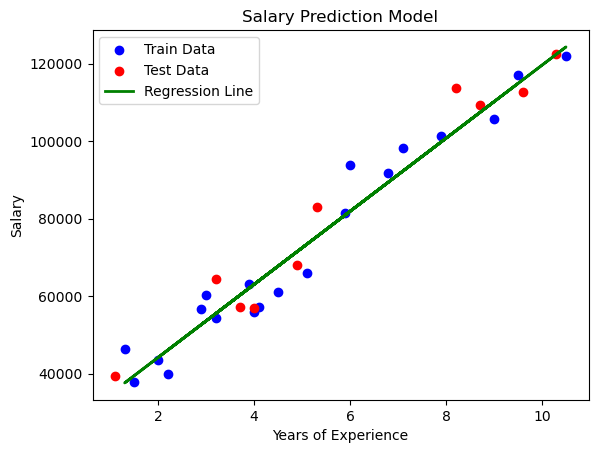

In [1]:
#4
#Import Libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

#  Load the Dataset”
data = pd.read_csv("Salary_Data.csv")
print("Frist few rows of the data frame")
print(data.head())
# b) Split the data into train_test partitions
X = data[['YearsExperience']]  # Assuming the independent variable is in the 'YearsExperience' column
y = data['Salary']              # Assuming the dependent variable is in the 'Salary' column

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

#Train and predict the model
model = LinearRegression()
model.fit(X_train, y_train)
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

#Calculate the mean_squared error
mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)

print(f"Mean Squared Error (Train): {mse_train}")
print(f"Mean Squared Error (Test): {mse_test}")

#Visualize both train and test data using scatter plot
plt.scatter(X_train, y_train, color='blue', label='Train Data')
plt.scatter(X_test, y_test, color='red', label='Test Data')
plt.plot(X_train, y_train_pred, color='green', linewidth=2, label='Regression Line')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.title('Salary Prediction Model')
plt.legend()
plt.show()

In [13]:
5.
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
iris = load_iris()
X, y = iris.data, iris.target
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)
pipeline = make_pipeline(StandardScaler(), LogisticRegression(max_iter=1000))
param_grid = {
    'logisticregression__C': [0.001, 0.01, 0.1, 1, 10, 100],
}
grid_search = GridSearchCV(pipeline, param_grid, cv=5)
grid_search.fit(X_train, y_train)
print("Best hyperparameters:", grid_search.best_params_)
val_accuracy = grid_search.score(X_val, y_val)
print("Validation Accuracy:", val_accuracy)

Best hyperparameters: {'logisticregression__C': 1}
Validation Accuracy: 1.0


5.
Number of LSTM Layers and Units:

The number of LSTM layers and units is often determined through experimentation and validation. A common approach is to start with a simple architecture and gradually increase the complexity until the model's performance on a validation set stops improving. Too few layers or units may not capture complex patterns in the data, while too many may lead to overfitting.
Preprocessing Steps on Time Series Data:

Preprocessing steps typically include handling missing values, removing outliers, normalizing the data, and splitting it into training and validation sets. For time series data specifically, additional steps may include differencing, scaling, or windowing to create input-output pairs.
Purpose of Dropout Layers in LSTM Networks:

Dropout layers in LSTM networks serve to prevent overfitting by randomly setting a fraction of input units to zero during training. This helps the model learn more robust features and reduces reliance on specific neurons, making it less likely to memorize noise in the training data. Dropout acts as a form of regularization and improves the generalization of the model.
Model's Ability to Capture Long-Term Dependencies and Make Accurate Predictions:

LSTM networks are designed to capture long-term dependencies in sequential data, making them well-suited for time series forecasting. The model's ability to capture long-term dependencies and make accurate predictions depends on factors such as the architecture, hyperparameters, and the complexity of patterns in the data. Evaluation metrics like Mean Absolute Error (MAE) or Root Mean Squared Error (RMSE) can provide insights into the model's performance.
Potential Improvements or Alternative Approaches:

Experimenting with different architectures, including variations of LSTM networks (e.g., bidirectional LSTMs, stacked LSTMs), can improve forecasting performance.
Ensemble methods, such as combining predictions from multiple LSTM models, can enhance robustness and generalization.
Feature engineering techniques, like incorporating external variables or creating lag features, may help capture additional information and improve predictions.
Advanced optimization techniques, such as learning rate schedules or using adaptive learning rate algorithms like Adam, can aid in faster convergence and better performance.
Incorporating attention mechanisms or other advanced architectures, like Transformers, may offer alternative approaches for capturing long-term dependencies in time series data.